## Preparação de Dados
Introdução à Ciência de Dados

Aluna: Aurenívia Gomes da Costa


http://agencia.tse.jus.br/estatistica/sead/eleitorado/filiados/uf/filiados_dem_ac.zip

https://dados.gov.br/dataset/filiados-partidos-politicos


# Parte 1: Passos Iniciais e criação do Dataset

In [ ]:
#@markdown clique nessa célula para instalar as bibliotecas necessárias para a execução deste projeto
"""
%pip install get_wayback_machine 

In [2]:
#@title Passo 1: download e extração dos arquivos:
#@markdown nessa passo, iremos baixar os arquivos do dataset via wayback machine e extrair seus conteúdos.
import requests, zipfile, io, os
import get_wayback_machine
from tqdm.notebook import tqdm # imprimir barra de progresso

# Lista de Partidos e Estados

PARTIDOS = ['dem','pc_do_b','pcb','pco','pdt','phs','pmdb','pmn','pp','ppl',
            'pps','pr','prb','prtb','psb','psc','psd','psdb','psdc','psl',
            'psol','pstu','pt','pt_do_b','ptb','ptc','ptn','pv']

# para esse momento, escolhendo o estado do paraíba
ESTADOS = [ 'pb']

urls = [f'http://agencia.tse.jus.br/estatistica/sead/eleitorado/filiados/uf/filiados_{partido}_pb.zip' \
        for uf in ESTADOS for partido in PARTIDOS]


# Baixar e extrair os dados

acertos, erros = 0,0

for url in tqdm(urls):
  r = get_wayback_machine.get(url)
  if r is not None and r.status_code == 200:
    z = zipfile.ZipFile(io.BytesIO(r.content))\
    .extractall('filiados/')
    acertos += 1;
  else:
    print(f"erro {url}")
    erros += 1;

print(f"arquivos baixados com sucesso {acertos}, erros: {erros}");

# Listar e extrair os arquivos.

CAMINHO = '/content/filiados/aplic/sead/lista_filiados/uf/'
arquivos = []

for _, __, files in os.walk(CAMINHO):
  for file in files:
    if file.endswith(".csv"):
      arquivos.append(CAMINHO + file)

print("arquivos extraídos e listados com sucesso");


arquivos baixados com sucesso 28, erros: 0
arquivos extraídos e listados com sucesso


In [4]:
#@markdown Passo 2 - processamento das planilhas e criação do dataset
import pandas as pd

COLUNAS_USADAS = ['SIGLA DO PARTIDO',
       'CODIGO DO MUNICIPIO', 'NOME DO MUNICIPIO', 'ZONA ELEITORAL',
       'SECAO ELEITORAL', 'DATA DA FILIACAO', 'SITUACAO DO REGISTRO',
       'DATA DO PROCESSAMENTO', 'DATA DA DESFILIACAO',
       'DATA DO CANCELAMENTO', 'DATA DA REGULARIZACAO',
       'MOTIVO DO CANCELAMENTO']

DTYPES = {'CODIGO DO MUNICIPIO': 'object',
          'MOTIVO DO CANCELAMENTO': 'object',
          'NOME DO MUNICIPIO': 'object',
          'SECAO ELEITORAL': 'object',
          'SIGLA DO PARTIDO': 'object',
          'SITUACAO DO REGISTRO': 'object',
          'UF': 'object',
          'ZONA ELEITORAL': 'object'}

DATAS = ['DATA DA FILIACAO', 
         'DATA DA REGULARIZACAO', 
         'DATA DA DESFILIACAO', 
         'DATA DO CANCELAMENTO',
         'DATA DO PROCESSAMENTO']

filiados_importados = \
    pd.concat([pd.read_csv(arquivo, 
                error_bad_lines=False,
                engine='python',
                sep=None, 
                encoding='latin-1',
                parse_dates=DATAS,
                date_parser=lambda c: pd.to_datetime(c, errors='coerce'),
                usecols = COLUNAS_USADAS, 
                dtype=DTYPES) \
              for arquivo in arquivos], 
          ignore_index=True);


df = filiados_importados
df

,SIGLA DO PARTIDO,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
0,PMN,21172,PATOS,28,129,2007-03-10,REGULAR,2017-10-14,NaT,NaT,NaT,NaN
1,PMN,19399,BELÉM,54,17,2007-09-20,CANCELADO,2016-04-15,NaT,2011-12-15,NaT,Judicial
2,PMN,20516,JOÃO PESSOA,64,104,2003-09-30,REGULAR,2017-10-14,NaT,NaT,NaT,NaN
3,PMN,19933,CONDE,73,123,2003-03-10,CANCELADO,2016-04-15,2008-07-17,2008-07-17,NaT,Judicial
4,PMN,20516,JOÃO PESSOA,77,56,2003-02-10,DESFILIADO,2017-10-14,2015-12-11,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
476739,PPL,20397,ITABAIANA,6,81,2012-11-02,CANCELADO,2013-10-18,2012-05-24,2012-05-24,NaT,Judicial
476740,PPL,20397,ITABAIANA,6,29,2011-06-10,CANCELADO,2018-10-16,NaT,2015-03-08,NaT,A pedido do eleitor
476741,PPL,20397,ITABAIANA,6,80,2011-06-10,CANCELADO,2013-10-18,2013-10-10,2013-10-10,NaT,A pedido do eleitor
476742,PPL,20397,ITABAIANA,6,29,2011-06-10,REGULAR,2013-10-18,NaT,NaT,NaT,NaN


In [5]:
df.dtypes # verificando seus tipos de dados

SIGLA DO PARTIDO                  object
CODIGO DO MUNICIPIO               object
NOME DO MUNICIPIO                 object
ZONA ELEITORAL                    object
SECAO ELEITORAL                   object
DATA DA FILIACAO          datetime64[ns]
SITUACAO DO REGISTRO              object
DATA DO PROCESSAMENTO     datetime64[ns]
DATA DA DESFILIACAO       datetime64[ns]
DATA DO CANCELAMENTO      datetime64[ns]
DATA DA REGULARIZACAO     datetime64[ns]
MOTIVO DO CANCELAMENTO            object
dtype: object

# Parte 2 - Exploração Inicial e Boxplot

In [8]:
contagem_por_partido = df["SIGLA DO PARTIDO"].value_counts()
# filiados_paraiba["SITUACAO DO REGISTRO"].value_counts().plot.bar()
# filiados_paraiba["NOME DO MUNICIPIO"].value_counts()

print(f"Filiados por partido:\n\
MÉDIA: {round(contagem_por_partido.mean(),2)}\n\
VARIÂNCIA: {round(contagem_por_partido.var(),2)}\n\
DESVIO PADRÃO: {round(contagem_por_partido.std(),2)}\n\
MEDIANA: {round(contagem_por_partido.median(),2)}\n\
MODA: {round(contagem_por_partido.mode()[0],2)}")

Filiados por partido:
MÉDIA: 17026.57
VARIÂNCIA: 367153508.77
DESVIO PADRÃO: 19161.25
MEDIANA: 8932.0
MODA: 123


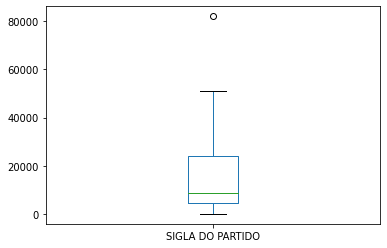

In [ ]:
# fazendo boxplot do dado
contagem_por_partido.plot.box()

In [ ]:
filiados_paraiba.to_csv("filiados.csv");

# Parte 3
## Visualização de Dados



In [ ]:
#@markdown Preparação de dados para visualização
filiados_paraiba.groupby(by=["SIGLA DO PARTIDO", "NOME DO MUNICIPIO", "SITUACAO DO REGISTRO"]).size().reset_index(name='counts')

,SIGLA DO PARTIDO,NOME DO MUNICIPIO,SITUACAO DO REGISTRO,counts
0,DEM,AGUIAR,CANCELADO,87
1,DEM,AGUIAR,DESFILIADO,3
2,DEM,AGUIAR,REGULAR,104
3,DEM,ALAGOA GRANDE,CANCELADO,124
4,DEM,ALAGOA GRANDE,DESFILIADO,28
...,...,...,...,...
8966,PV,TACIMA,REGULAR,11
8967,PV,TEIXEIRA,CANCELADO,1
8968,PV,TEIXEIRA,REGULAR,27
8969,PV,UIRAÚNA,CANCELADO,26


,SIGLA DO PARTIDO,QUANTIDADE
6,PMDB,49925
0,DEM,35726
17,PSDB,33908
22,PT,29050
8,PP,25622
24,PTB,21455
14,PSB,19717
11,PR,17333
4,PDT,16251
12,PRB,11151


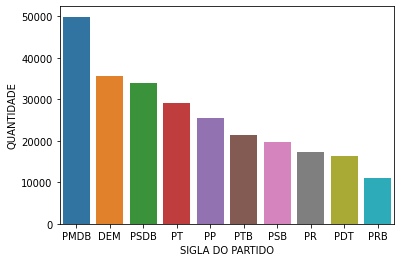

In [ ]:
#@title Registro Ativos de Pessoas Físicas em Partidos
import seaborn as sns
filiados_por_partido = filiados_paraiba\
  [filiados_paraiba['SITUACAO DO REGISTRO'] == "REGULAR"]\
  .groupby(by=["SIGLA DO PARTIDO"])\
  .size()\
  .reset_index(name='QUANTIDADE')\
  .sort_values(by="QUANTIDADE", ascending=False)\
  .head(10)
  # .set_index('SIGLA DO PARTIDO')

sns.barplot(data=filiados_por_partido, x="SIGLA DO PARTIDO", y="QUANTIDADE")
filiados_por_partido

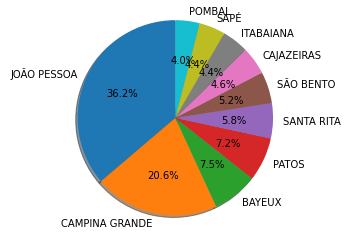

,NOME DO MUNICIPIO,QUANTIDADE
93,JOÃO PESSOA,36536
48,CAMPINA GRANDE,20819
22,BAYEUX,7545
133,PATOS,7303
169,SANTA RITA,5876
188,SÃO BENTO,5255
44,CAJAZEIRAS,4644
86,ITABAIANA,4437
174,SAPÉ,4387
147,POMBAL,4033


In [ ]:
#@title Registro Ativos de Pessoas Físicas em Partidos por MUNICÍPIO
import seaborn as sns
import matplotlib.pyplot as plt


filiados_por_municipio = filiados_paraiba\
  [filiados_paraiba['SITUACAO DO REGISTRO'] == "REGULAR"]\
  .groupby(by=["NOME DO MUNICIPIO"])\
  .size()\
  .reset_index(name='QUANTIDADE')\
  .sort_values(by="QUANTIDADE", ascending=False)\
  .head(10)



fig1, ax1 = plt.subplots()
ax1.pie(filiados_por_municipio["QUANTIDADE"], labels=filiados_por_municipio["NOME DO MUNICIPIO"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
filiados_por_municipio

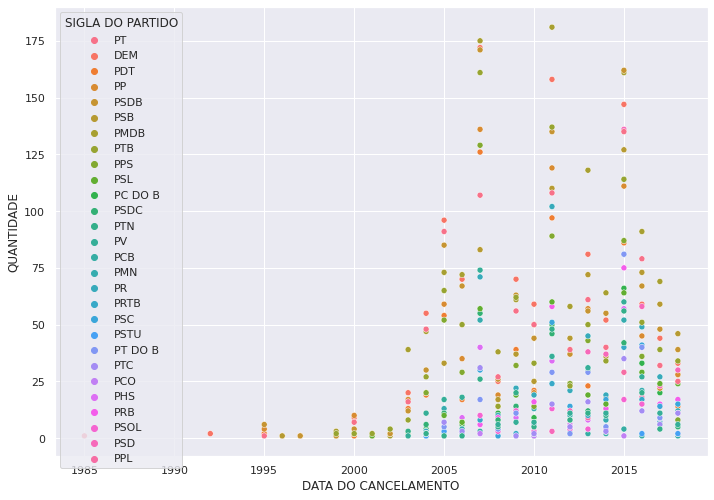

In [ ]:
#@title Gráfico de Dispersão  dos Cadastros Cancelados á Pedido do Eleitor 


cancelados = filiados_paraiba\
  [(filiados_paraiba['SITUACAO DO REGISTRO'] == "CANCELADO") &\
   (filiados_paraiba['MOTIVO DO CANCELAMENTO'] == "A pedido do eleitor")]\
  .groupby(by=["SIGLA DO PARTIDO", "DATA DO CANCELAMENTO"])\
  .size()\
  .reset_index(name='QUANTIDADE')\
  .sort_values(by="QUANTIDADE", ascending=False)\

cancelados['DATA DO CANCELAMENTO'] = pd.to_datetime(cancelados['DATA DO CANCELAMENTO'], errors='ignore');

cancelados = cancelados\
  [(cancelados['DATA DO CANCELAMENTO'].dt.year < 2019) &\
   (cancelados['DATA DO CANCELAMENTO'].dt.year > 1970 )]\
  .groupby(by=[cancelados["DATA DO CANCELAMENTO"].dt.year, "SIGLA DO PARTIDO"])\
  .size()\
  .reset_index(name="QUANTIDADE");

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=cancelados, x="DATA DO CANCELAMENTO", y="QUANTIDADE",hue="SIGLA DO PARTIDO")

# Parte 5 e 6: Limpeza, Agrupamento e transformação dos dados

In [99]:
from sklearn.cluster import KMeans

registro = pd.DataFrame()

registro['REGULARES'] = df[df['SITUACAO DO REGISTRO'] == 'REGULAR']['SIGLA DO PARTIDO'].value_counts()
registro['CANCELADOS'] = df[df['SITUACAO DO REGISTRO'] == 'CANCELADO']['SIGLA DO PARTIDO'].value_counts()
registro['DESFILIADOS'] = df[df['SITUACAO DO REGISTRO'] == 'DESFILIADO']['SIGLA DO PARTIDO'].value_counts()
registro['CANCELADOS/DESFILIADOS'] = df[df['SITUACAO DO REGISTRO'].isin(['CANCELADO', 'DESFILIADO'])]['SIGLA DO PARTIDO'].value_counts()

df_group = registro[['REGULARES','CANCELADOS/DESFILIADOS']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_group)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

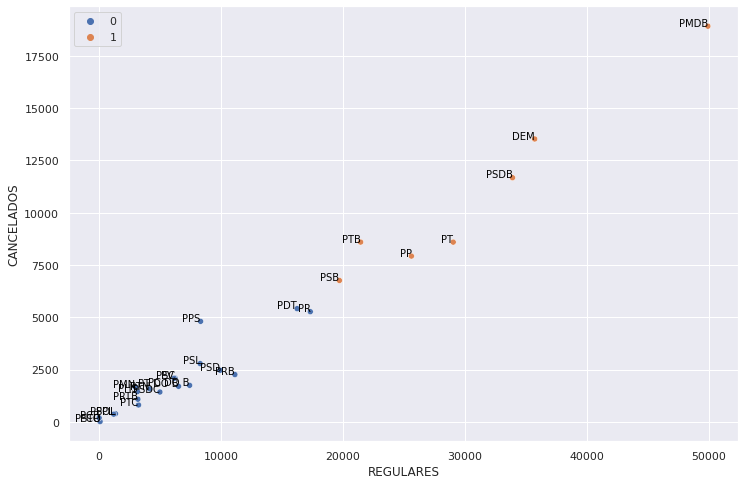

In [76]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

p1 = sns.scatterplot(data=registro, x='REGULARES', y='CANCELADOS',  hue=kmeans.labels_)

for line in range(0,registro.shape[0]):
  p1.text(registro['REGULARES'][line]+10, 
          registro['CANCELADOS'][line], registro.index[line], horizontalalignment='right', 
  size='small', color='black', weight='regular')

In [100]:
cluster_map = pd.DataFrame()
cluster_map['partido'] = registro.index.values
cluster_map['cluster'] = kmeans.labels_
print(cluster_map[cluster_map['cluster'] == 0]['partido'].values)
print(cluster_map[cluster_map['cluster'] == 1]['partido'].values)
print(cluster_map[cluster_map['cluster'] == 2]['partido'].values)
# print(cluster_map[cluster_map['cluster'] == 3]['partido'].values)

['PR' 'PDT' 'PRB' 'PSD' 'PPS' 'PSL' 'PC DO B' 'PT DO B' 'PSC' 'PV' 'PSDC'
 'PTN' 'PTC' 'PRTB' 'PHS' 'PMN' 'PSOL' 'PPL' 'PCO' 'PSTU' 'PCB']
['PMDB' 'DEM' 'PSDB' 'PT' 'PP' 'PTB' 'PSB']
[]


In [ ]:
reg_data = []

for year in range(1900, 2020):
  df[(df['DATA DA FILIACAO'].dt.year < i) & (df['DATA DA DESFILIACAO'] < i]
registro['REGULARES'] = df[df['SITUACAO DO REGISTRO'] == 'REGULAR']['SIGLA DO PARTIDO'].value_counts()
registro['CANCELADOS'] = df[df['SITUACAO DO REGISTRO'] == 'CANCELADO']['SIGLA DO PARTIDO'].value_counts()
registro['DESFILIADOS'] = df[df['SITUACAO DO REGISTRO'] == 'DESFILIADO']['SIGLA DO PARTIDO'].value_counts()
registro['CANCELADOS/DESFILIADOS'] = df[df['SITUACAO DO REGISTRO'].isin(['CANCELADO', 'DESFILIADO'])]['SIGLA DO PARTIDO'].value_counts()

registro

In [29]:
DATA_INICIO = '2016-08-31'
DATA_FIM = '2017-06-01'

df[(df['DATA DA FILIACAO'] < DATA_INICIO) & \
   ( (df['DATA DO CANCELAMENTO'] < DATA_INICIO) | (df['SITUACAO DO REGISTRO'] == 'REGULAR') | (df['DATA DO CANCELAMENTO'] < DATA_INICIO) )]\
  #  .groupby(df['DATA DO CANCELAMENTO'].dt.year).count()

# df[(df['DATA DA DESFILIACAO'] > '2016-08-31') & (df['DATA DA DESFILIACAO'] < '2017-06-01')].groupby("SIGLA DO PARTIDO").count()


,SIGLA DO PARTIDO,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
0,PMN,21172,PATOS,28,129,2007-03-10,REGULAR,2017-10-14,NaT,NaT,NaT,NaN
1,PMN,19399,BELÉM,54,17,2007-09-20,CANCELADO,2016-04-15,NaT,2011-12-15,NaT,Judicial
2,PMN,20516,JOÃO PESSOA,64,104,2003-09-30,REGULAR,2017-10-14,NaT,NaT,NaT,NaN
3,PMN,19933,CONDE,73,123,2003-03-10,CANCELADO,2016-04-15,2008-07-17,2008-07-17,NaT,Judicial
5,PMN,19992,CRUZ DO ESPÍRITO SANTO,3,15,2003-01-10,REGULAR,2016-04-15,NaT,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
476739,PPL,20397,ITABAIANA,6,81,2012-11-02,CANCELADO,2013-10-18,2012-05-24,2012-05-24,NaT,Judicial
476740,PPL,20397,ITABAIANA,6,29,2011-06-10,CANCELADO,2018-10-16,NaT,2015-03-08,NaT,A pedido do eleitor
476741,PPL,20397,ITABAIANA,6,80,2011-06-10,CANCELADO,2013-10-18,2013-10-10,2013-10-10,NaT,A pedido do eleitor
476742,PPL,20397,ITABAIANA,6,29,2011-06-10,REGULAR,2013-10-18,NaT,NaT,NaT,NaN


In [85]:
a = pd.DataFrame()
d = df[df['MOTIVO DO CANCELAMENTO'] == 'A pedido do eleitor']
# a['DATA FILIACAO'] = d.groupby(d['DATA DA FILIACAO'].dt.year).size()
a['DATA CANCELAMENTO/DESFILIACAO'] = df.groupby(df['DATA DO CANCELAMENTO'].dt.year).size()
a.loc[1980: 2020]

,DATA CANCELAMENTO/DESFILIACAO
DATA DO CANCELAMENTO,
1985.0,2
1986.0,1
1988.0,18
1992.0,4
1995.0,23
1996.0,6
1997.0,4
1998.0,3
1999.0,24


In [82]:
df['MOTIVO DO CANCELAMENTO'].value_counts()

A pedido do eleitor        46080
Cancelamento automático    35125
Judicial                   28623
A pedido do partido         1333
Name: MOTIVO DO CANCELAMENTO, dtype: int64